Just testing some preprocessing techniques

In [ ]:
import os
data = os.listdir('./Dataset/test_data')
data[2] # 2 will be the idx

'ADNI_002_S_0413_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070713121420365_S32938_I60008.nii'

In [ ]:
import os
import sys
import nibabel as nib

from HD_BET.entry_point import main

idx = 2  # Change this to select a different file

# Get .nii file
data = os.listdir('./Dataset/test_data')
nii_file = os.path.join('./Dataset/test_data', data[idx])


if nii_file.endswith('.nii'):
    nii_img = nib.load(nii_file)
    gz_path = nii_file + '.gz'
    nib.save(nii_img, gz_path)
    print("✅ Converted to .nii.gz")
else:
    gz_path = nii_file  # already .nii.gz


base = os.path.basename(gz_path).replace('.nii.gz', '')
output_path = os.path.join('BET_OUTPUT', base + '_bet.nii.gz')

# HD-BET stuff
sys.argv = [
    'hd-bet',
    '-i', gz_path,
    '-o', output_path,
    '-device', 'cpu'
]


# Run HD-BET
try:
    main()
    print("HD-BET skull stripping completed.")
except SystemExit as e:
    print(f"HD-BET exited with code {e.code}. Check your inputs.")

100%|██████████| 12/12 [21:33<00:00, 107.79s/it]


In [5]:
idx = 2

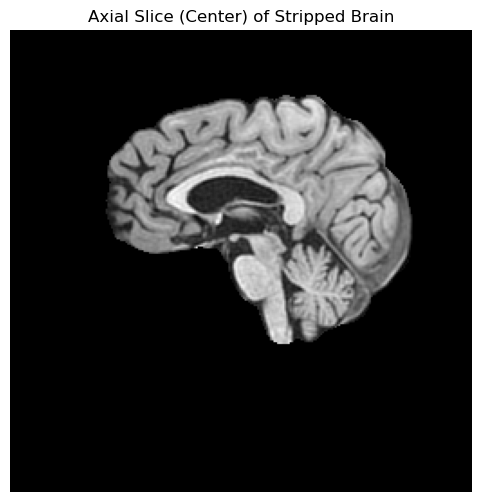

In [6]:
import nibabel as nib
import matplotlib.pyplot as plt
%matplotlib inline

# Path to your output .nii.gz image
data = os.listdir('./Dataset/test_data')
input_file = os.path.join('./Dataset/test_data', data[idx])
base = os.path.basename(input_file).replace('.nii.gz', '').replace('.nii', '')
output_path = os.path.join('BET_OUTPUT', base + '_bet.nii.gz')

# Load the skull-stripped image
img = nib.load(output_path)
data = img.get_fdata()
plt.figure(figsize=(6,6))
plt.imshow(data[:, :, data.shape[2]//2], cmap='gray')
plt.title('Axial Slice (Center) of Stripped Brain')
plt.axis('off')
plt.show()

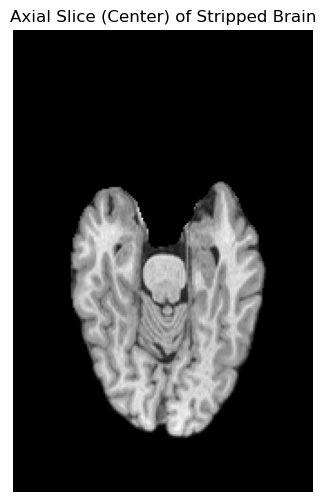

In [8]:
import os
import sys
import nibabel as nib
import matplotlib.pyplot as plt

test_path = os.path.join('./BET_OUTPUT/ADNI_002_S_0413_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070713121420365_S32938_I60008_bet.nii.gz')
img = nib.load(test_path)
data = img.get_fdata()
plt.figure(figsize=(6,6))
plt.imshow(data[data.shape[0]//2, :, :], cmap='gray')
plt.title('Axial Slice (Center) of Stripped Brain')
plt.axis('off')
plt.show()

In [3]:
output_path

'BET_OUTPUT\\ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070219173850420_S21856_I40966_bet.nii.gz'

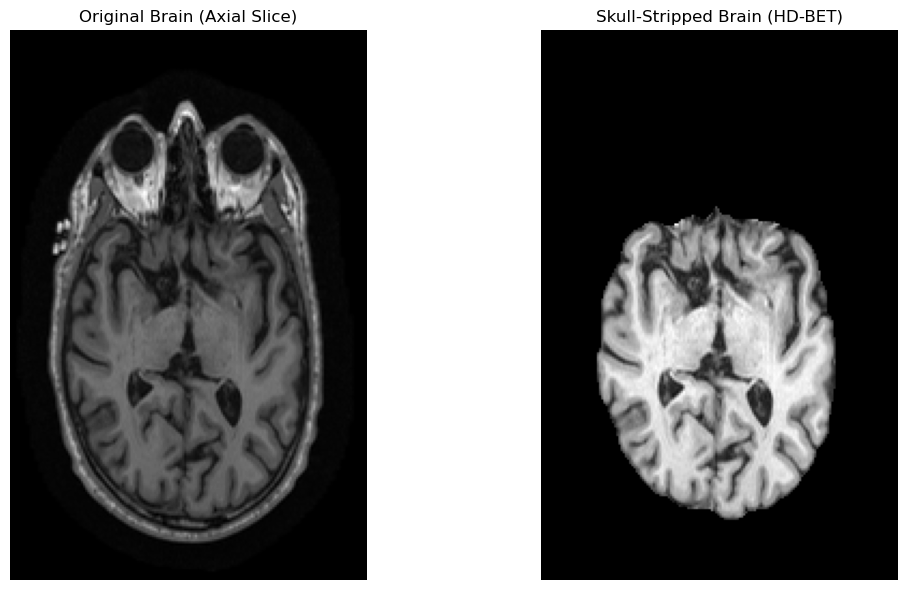

In [7]:
import nibabel as nib
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Paths
input_dir = './Dataset/test_data'

# Load file
data = os.listdir('./Dataset/test_data')
input_file = os.path.join('./Dataset/test_data', data[0])
base = os.path.basename(input_file).replace('.nii.gz', '').replace('.nii', '')
output_path = os.path.join('BET_OUTPUT', base + '_bet.nii.gz')

# Load original and skull-stripped images
img_orig = nib.load(input_file)
img_bet = nib.load(output_path)

data_orig = img_orig.get_fdata()
data_bet = img_bet.get_fdata()

# Choose central axial slice
slice_idx = data_orig.shape[0] // 2

# Plot side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(data_orig[slice_idx, :, :], cmap='gray')
plt.title('Original Brain (Axial Slice)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(data_bet[slice_idx, :, :], cmap='gray')
plt.title('Skull-Stripped Brain (HD-BET)')
plt.axis('off')

plt.tight_layout()
plt.show()
